In [1]:
import re
import numpy as np
import pandas as pd

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict

In [3]:
from scores import get_score

In [4]:
df_magpie = pd.read_csv("mrl_featurised_data.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'mrl_featurised_data.csv'

In [ ]:
df_magpie.shape

In [ ]:
df_magpie.head(2)

In [ ]:
y_sc = df_magpie['seebeck_coefficient']
y_ec = df_magpie['electrical_conductivity']
y_tc = df_magpie['thermal_conductivity']
y_pf = df_magpie['power_factor']
y_zt = df_magpie['ZT']

In [ ]:
y_dict = {
    'Seebeck Coefficient': y_sc,
    'Electrical Conductivity': y_ec,
    'Thermal Conductivity': y_tc,
    'Power Factor': y_pf,
    'ZT': y_zt
}

In [ ]:
drop_feat = ['Formula', 'composition', 'seebeck_coefficient',
            'electrical_conductivity', 'thermal_conductivity', 'power_factor', 'ZT']

In [ ]:
df_magpie_feat = df_magpie.drop(drop_feat, axis = 1)

In [ ]:
df_magpie_feat.head(2)

In [5]:
df_magpie_feat.shape

NameError: name 'df_magpie_feat' is not defined

In [15]:
for prop, y in y_dict.items():
    rf = RandomForestRegressor()
    y_pred = cross_val_predict(rf, df_magpie_feat, y, cv=5)
    print(f"{'#'*10} {prop} {'#'*10}")
    print(get_score(y, y_pred, 4))

########## Seebeck Coefficient ##########
{'R': 0.9318, 'R2': 0.868, 'MAE': 40.5916, 'RMSE': 72.6658, 'RAE': 0.2684, 'RSE': 0.132}
########## Electrical Conductivity ##########
{'R': 0.8153, 'R2': 0.618, 'MAE': 831.068, 'RMSE': 5446.1364, 'RAE': 0.4056, 'RSE': 0.382}
########## Thermal Conductivity ##########
{'R': 0.8375, 'R2': 0.685, 'MAE': 1.2175, 'RMSE': 2.9361, 'RAE': 0.4223, 'RSE': 0.315}
########## Power Factor ##########
{'R': 0.8554, 'R2': 0.7208, 'MAE': 0.0003, 'RMSE': 0.0006, 'RAE': 0.3792, 'RSE': 0.2792}
########## ZT ##########
{'R': 0.6459, 'R2': 0.3571, 'MAE': 0.1258, 'RMSE': 0.2402, 'RAE': 0.6317, 'RSE': 0.6429}


In [18]:
rf = RandomForestRegressor()
y_pred = cross_val_predict(rf, df_magpie_feat, y_sc, cv=5)
get_score(y_sc, y_pred)

{'R': 0.93064132,
 'R2': 0.8655002,
 'MAE': 41.05727013,
 'RMSE': 73.34386609,
 'RAE': 0.27147228,
 'RSE': 0.1344998}

In [19]:
scape_grp_feats = [feat for feat in df_magpie_feat.columns.values if 'SpaceGroup' in feat]

In [21]:
df_magpie_feat_without_sg = df_magpie_feat.drop(scape_grp_feats, axis=1)

In [29]:
df_magpie_feat_without_sg.shape

(573, 127)

In [24]:
rf = RandomForestRegressor()
y_pred = cross_val_predict(rf, df_magpie_feat_without_sg, y_sc, cv=5)
get_score(y_sc, y_pred)

{'R': 0.9284136,
 'R2': 0.86159182,
 'MAE': 41.70627805,
 'RMSE': 74.40187048,
 'RAE': 0.27576354,
 'RSE': 0.13840818}

In [27]:
df_magpie_feat_without_sg_ff = df_magpie_feat_without_sg.drop(
                                df_magpie_feat_without_sg.columns[df_magpie_feat_without_sg.nunique()<2], axis=1)

In [30]:
df_magpie_feat_without_sg_ff.shape

(573, 120)

In [32]:
rf = RandomForestRegressor()
y_pred = cross_val_predict(rf, df_magpie_feat_without_sg_ff, y_sc, cv=5)
get_score(y_sc, y_pred)

{'R': 0.92886002,
 'R2': 0.86236897,
 'MAE': 41.46187212,
 'RMSE': 74.19269759,
 'RAE': 0.27414752,
 'RSE': 0.13763103}

In [52]:
float_feats = [feat for feat in df_magpie_feat_without_sg_ff.columns[1:] if feat.split(' ')[1] in ['mean', 'avg_dev']]

In [38]:
df_magpie_feat_without_sg_ff.columns

Index(['temperature', 'MagpieData minimum Number', 'MagpieData maximum Number',
       'MagpieData range Number', 'MagpieData mean Number',
       'MagpieData avg_dev Number', 'MagpieData mode Number',
       'MagpieData minimum MendeleevNumber',
       'MagpieData maximum MendeleevNumber',
       'MagpieData range MendeleevNumber',
       ...
       'MagpieData maximum GSbandgap', 'MagpieData range GSbandgap',
       'MagpieData mean GSbandgap', 'MagpieData avg_dev GSbandgap',
       'MagpieData mode GSbandgap', 'MagpieData maximum GSmagmom',
       'MagpieData range GSmagmom', 'MagpieData mean GSmagmom',
       'MagpieData avg_dev GSmagmom', 'MagpieData mode GSmagmom'],
      dtype='object', length=120)

In [41]:
properties = set([prop.split(" ")[-1] for prop in df_magpie_feat_without_sg_ff.columns.values])
properties

{'AtomicWeight',
 'Column',
 'CovalentRadius',
 'Electronegativity',
 'GSbandgap',
 'GSmagmom',
 'GSvolume_pa',
 'MeltingT',
 'MendeleevNumber',
 'NUnfilled',
 'NValence',
 'NdUnfilled',
 'NdValence',
 'NfUnfilled',
 'NfValence',
 'NpUnfilled',
 'NpValence',
 'NsUnfilled',
 'NsValence',
 'Number',
 'Row',
 'temperature'}

In [57]:
temp_feat = set(df_magpie_feat_without_sg_ff) - set(float_feats)

int_feat = [feat for feat in temp_feat \
    if feat.split(' ')[-1] in \
             [prop for prop in properties if re.match(r'(temperature|Number|Row|Column|.*Valence|.*Unfilled)', prop)]]

float_feats += list(temp_feat - set(int_feat))

len(float_feats) + len(int_feat) == len(df_magpie_feat_without_sg_ff.columns)

True

In [60]:
df_magpie_feat_without_sg_ff[int_feat] = df_magpie_feat_without_sg_ff[int_feat].astype('int')

In [61]:
df_magpie_feat_without_sg_ff_int = df_magpie_feat_without_sg_ff.select_dtypes('int')
df_magpie_feat_without_sg_ff_float = df_magpie_feat_without_sg_ff.select_dtypes('float')

In [98]:
feats_to_drop = [feat for feat in df_magpie_feat_without_sg_ff_int.columns if \
                                     df_magpie_feat_without_sg_ff_int[feat].value_counts(normalize=True).max() > 0.90]

In [99]:
feats_to_drop += [feat for feat in df_magpie_feat_without_sg_ff_float.columns if \
                                df_magpie_feat_without_sg_ff_float[feat].value_counts(normalize=True).max() > 0.90]

In [100]:
df_magpie_feat_without_sg_ff_useful = df_magpie_feat_without_sg_ff.drop(feats_to_drop, axis=1)

In [101]:
df_magpie_feat_without_sg_ff_useful.shape

(573, 108)

In [102]:
rf = RandomForestRegressor()
y_pred = cross_val_predict(rf, df_magpie_feat_without_sg_ff_useful, y_sc, cv=5)
get_score(y_sc, y_pred)

{'R': 0.92572814,
 'R2': 0.85677939,
 'MAE': 41.41618419,
 'RMSE': 75.6842885,
 'RAE': 0.27384543,
 'RSE': 0.14322061}

In [168]:
max_col_names = [feat for feat in df_magpie_feat_without_sg_ff_useful.columns if 'maximum' in feat]
df_magpie_feat_without_sg_ff_useful_max_drop = df_magpie_feat_without_sg_ff_useful.drop(max_col_names, axis=1)
df_magpie_feat_without_sg_ff_useful_max_drop.shape

(573, 89)

In [104]:
rf = RandomForestRegressor()
y_pred = cross_val_predict(rf, df_magpie_feat_without_sg_ff_useful_max_drop, y_sc, cv=5)
get_score(y_sc, y_pred)

{'R': 0.93191075,
 'R2': 0.86814243,
 'MAE': 41.48176767,
 'RMSE': 72.61987586,
 'RAE': 0.27427907,
 'RSE': 0.13185757}

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

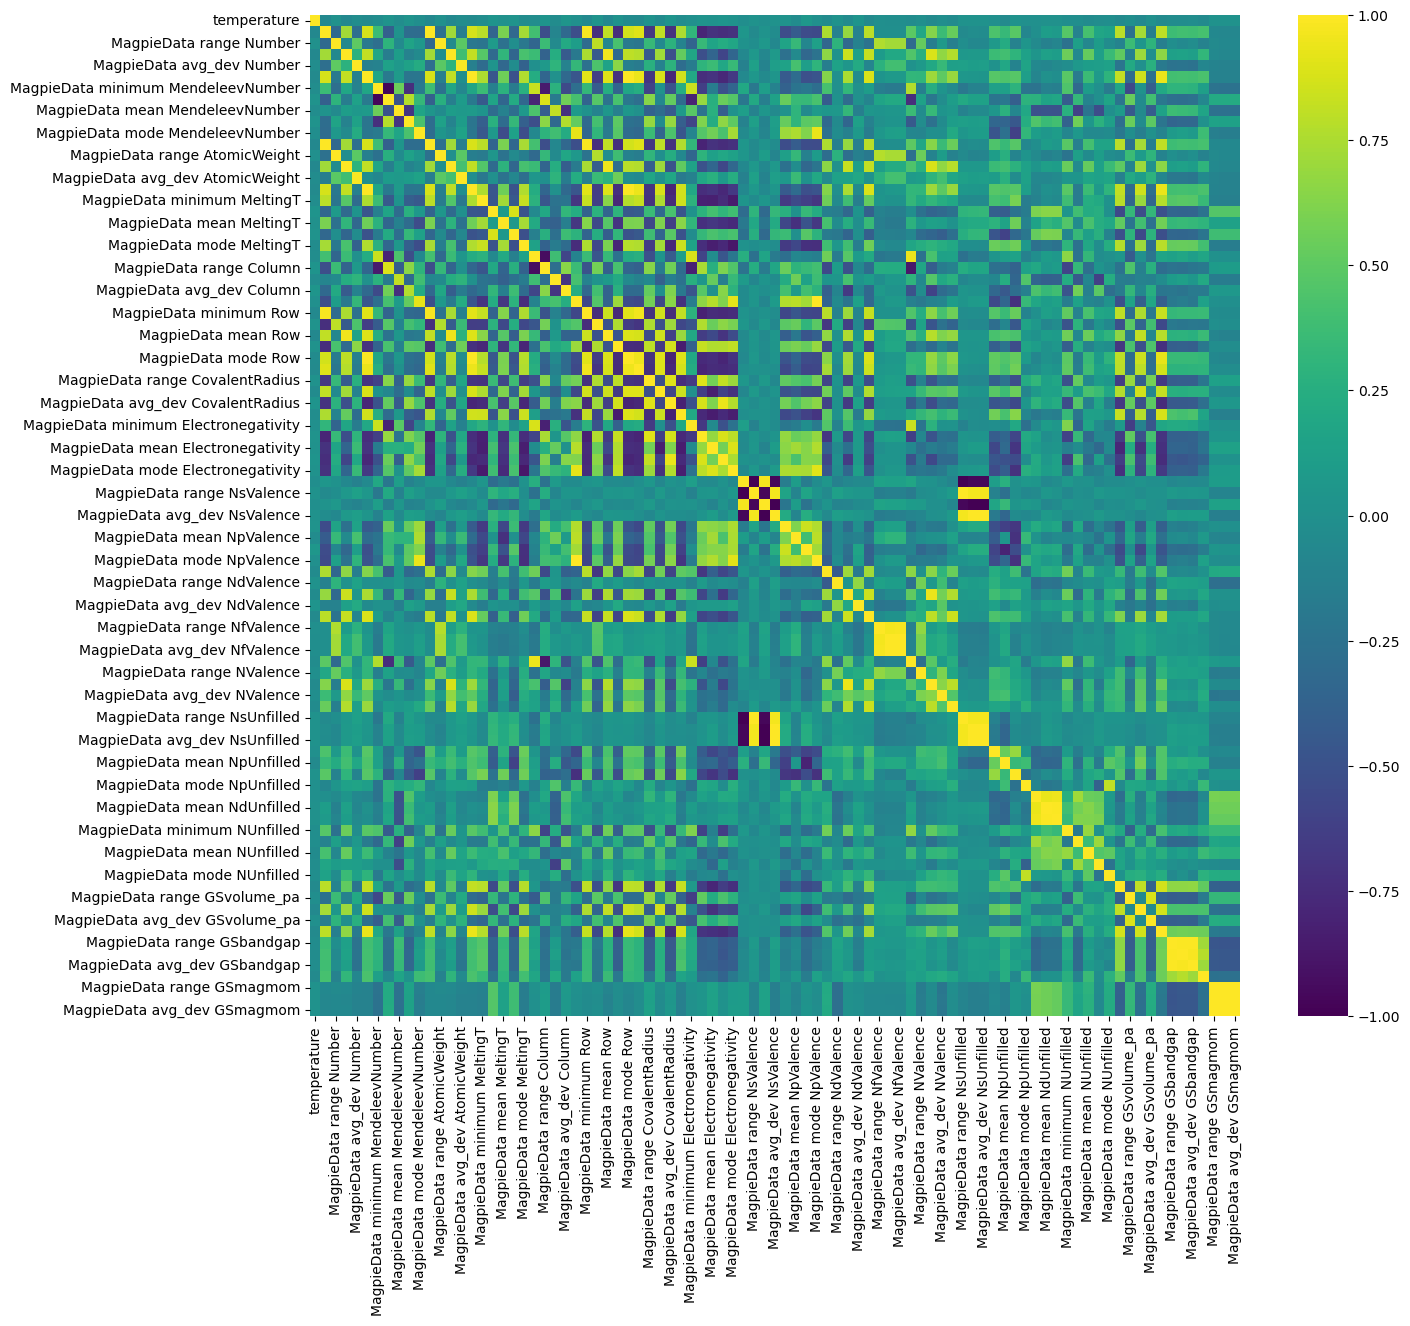

In [111]:
plt.figure(figsize=(15, 13))
corr = df_magpie_feat_without_sg_ff_useful_max_drop.corr(method = 'spearman')
sns.heatmap(corr, vmin=-1, vmax=1, cmap='viridis', annot=False)
plt.show()

In [169]:
corr = df_magpie_feat_without_sg_ff_useful_max_drop.corr(method = 'spearman').abs()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
high_corr_feats = [column for column in upper.columns if any(upper[column] > 0.90)]
len(high_corr_feats), high_corr_feats

(35,
 ['MagpieData range MendeleevNumber',
  'MagpieData minimum AtomicWeight',
  'MagpieData range AtomicWeight',
  'MagpieData mean AtomicWeight',
  'MagpieData avg_dev AtomicWeight',
  'MagpieData mode AtomicWeight',
  'MagpieData range Column',
  'MagpieData mode Column',
  'MagpieData minimum Row',
  'MagpieData mean Row',
  'MagpieData mode Row',
  'MagpieData minimum CovalentRadius',
  'MagpieData mean CovalentRadius',
  'MagpieData avg_dev CovalentRadius',
  'MagpieData range Electronegativity',
  'MagpieData avg_dev Electronegativity',
  'MagpieData mode Electronegativity',
  'MagpieData range NsValence',
  'MagpieData mean NsValence',
  'MagpieData avg_dev NsValence',
  'MagpieData mode NpValence',
  'MagpieData mean NfValence',
  'MagpieData avg_dev NfValence',
  'MagpieData minimum NValence',
  'MagpieData mean NValence',
  'MagpieData range NsUnfilled',
  'MagpieData mean NsUnfilled',
  'MagpieData avg_dev NsUnfilled',
  'MagpieData mean NdUnfilled',
  'MagpieData avg_dev 

In [118]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [119]:
def compute_vif(df, considered_features):
    
    X = df[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [170]:
vif = compute_vif(df_magpie_feat_without_sg_ff_useful_max_drop, high_corr_feats)
vif.sort_values('VIF', ascending=False)

/var/folders/fw/qmc3tx5x3pgfvwcxspt0s_h00000gn/T/ipykernel_53309/96923148.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1
/Users/in-divye.singh/anaconda3/envs/rl-virtual-screening/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/Users/in-divye.singh/anaconda3/envs/rl-virtual-screening/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,Variable,VIF
17,MagpieData range NsValence,inf
18,MagpieData mean NsValence,inf
27,MagpieData avg_dev NsUnfilled,inf
26,MagpieData mean NsUnfilled,inf
25,MagpieData range NsUnfilled,inf
19,MagpieData avg_dev NsValence,inf
9,MagpieData mean Row,792.261690
10,MagpieData mode Row,596.932462
3,MagpieData mean AtomicWeight,574.931621
5,MagpieData mode AtomicWeight,236.337274


In [171]:
high_corr_feats_2 = high_corr_feats.copy()
df_magpie_feat_without_sg_ff_useful_max_drop_vif = df_magpie_feat_without_sg_ff_useful_max_drop.copy()
vif = compute_vif(df_magpie_feat_without_sg_ff_useful_max_drop_vif, high_corr_feats)
vif_sorted = vif.sort_values('VIF', ascending=False).reset_index(drop=True)
while True:
    feat_to_remove = vif_sorted['Variable'][0]
    print(f"Removing feature: {feat_to_remove}")
    df_magpie_feat_without_sg_ff_useful_max_drop_vif = df_magpie_feat_without_sg_ff_useful_max_drop_vif.drop(
                                                                                            [feat_to_remove], axis=1)
    high_corr_feats_2.remove(feat_to_remove)
    vif = compute_vif(df_magpie_feat_without_sg_ff_useful_max_drop_vif, high_corr_feats_2)
    vif_sorted = vif.sort_values('VIF', ascending=False).reset_index(drop=True)
    if vif_sorted['VIF'][0] <= 10 or vif_sorted.shape[0]==1:
        break

/var/folders/fw/qmc3tx5x3pgfvwcxspt0s_h00000gn/T/ipykernel_53309/96923148.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1
/Users/in-divye.singh/anaconda3/envs/rl-virtual-screening/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/Users/in-divye.singh/anaconda3/envs/rl-virtual-screening/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/var/folders/fw/qmc3tx5x3pgfvwcxspt0s_h00000gn/T/ipykernel_53309/96923148.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

Removing feature: MagpieData range NsValence
Removing feature: MagpieData mean NsValence
Removing feature: MagpieData avg_dev NsUnfilled
Removing feature: MagpieData mean Row
Removing feature: MagpieData mode Row
Removing feature: MagpieData minimum Row
Removing feature: MagpieData mean GSmagmom


/var/folders/fw/qmc3tx5x3pgfvwcxspt0s_h00000gn/T/ipykernel_53309/96923148.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1
/var/folders/fw/qmc3tx5x3pgfvwcxspt0s_h00000gn/T/ipykernel_53309/96923148.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1
/var/folders/fw/qmc3tx5x3pgfvwcxspt0s_h00000gn/T/ipykernel_53309/96923148.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

Removing feature: MagpieData mean AtomicWeight
Removing feature: MagpieData mode Electronegativity
Removing feature: MagpieData minimum CovalentRadius
Removing feature: MagpieData mean NdUnfilled
Removing feature: MagpieData avg_dev NfValence
Removing feature: MagpieData avg_dev Electronegativity
Removing feature: MagpieData avg_dev NsValence
Removing feature: MagpieData mean CovalentRadius
Removing feature: MagpieData avg_dev CovalentRadius
Removing feature: MagpieData mean GSbandgap
Removing feature: MagpieData range Electronegativity
Removing feature: MagpieData mode AtomicWeight
Removing feature: MagpieData range Column


/var/folders/fw/qmc3tx5x3pgfvwcxspt0s_h00000gn/T/ipykernel_53309/96923148.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1
/var/folders/fw/qmc3tx5x3pgfvwcxspt0s_h00000gn/T/ipykernel_53309/96923148.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1
/var/folders/fw/qmc3tx5x3pgfvwcxspt0s_h00000gn/T/ipykernel_53309/96923148.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [172]:
vif_sorted

,Variable,VIF
0,MagpieData mode Column,7.615689
1,MagpieData mean NValence,6.711585
2,MagpieData mode NpValence,6.571273
3,MagpieData minimum AtomicWeight,4.723680
4,MagpieData mean NfValence,4.062626
5,MagpieData minimum NValence,3.612979
6,MagpieData mode GSvolume_pa,3.004007
7,MagpieData range MendeleevNumber,2.813347
8,MagpieData mean NsUnfilled,2.252557
9,MagpieData avg_dev AtomicWeight,2.237532


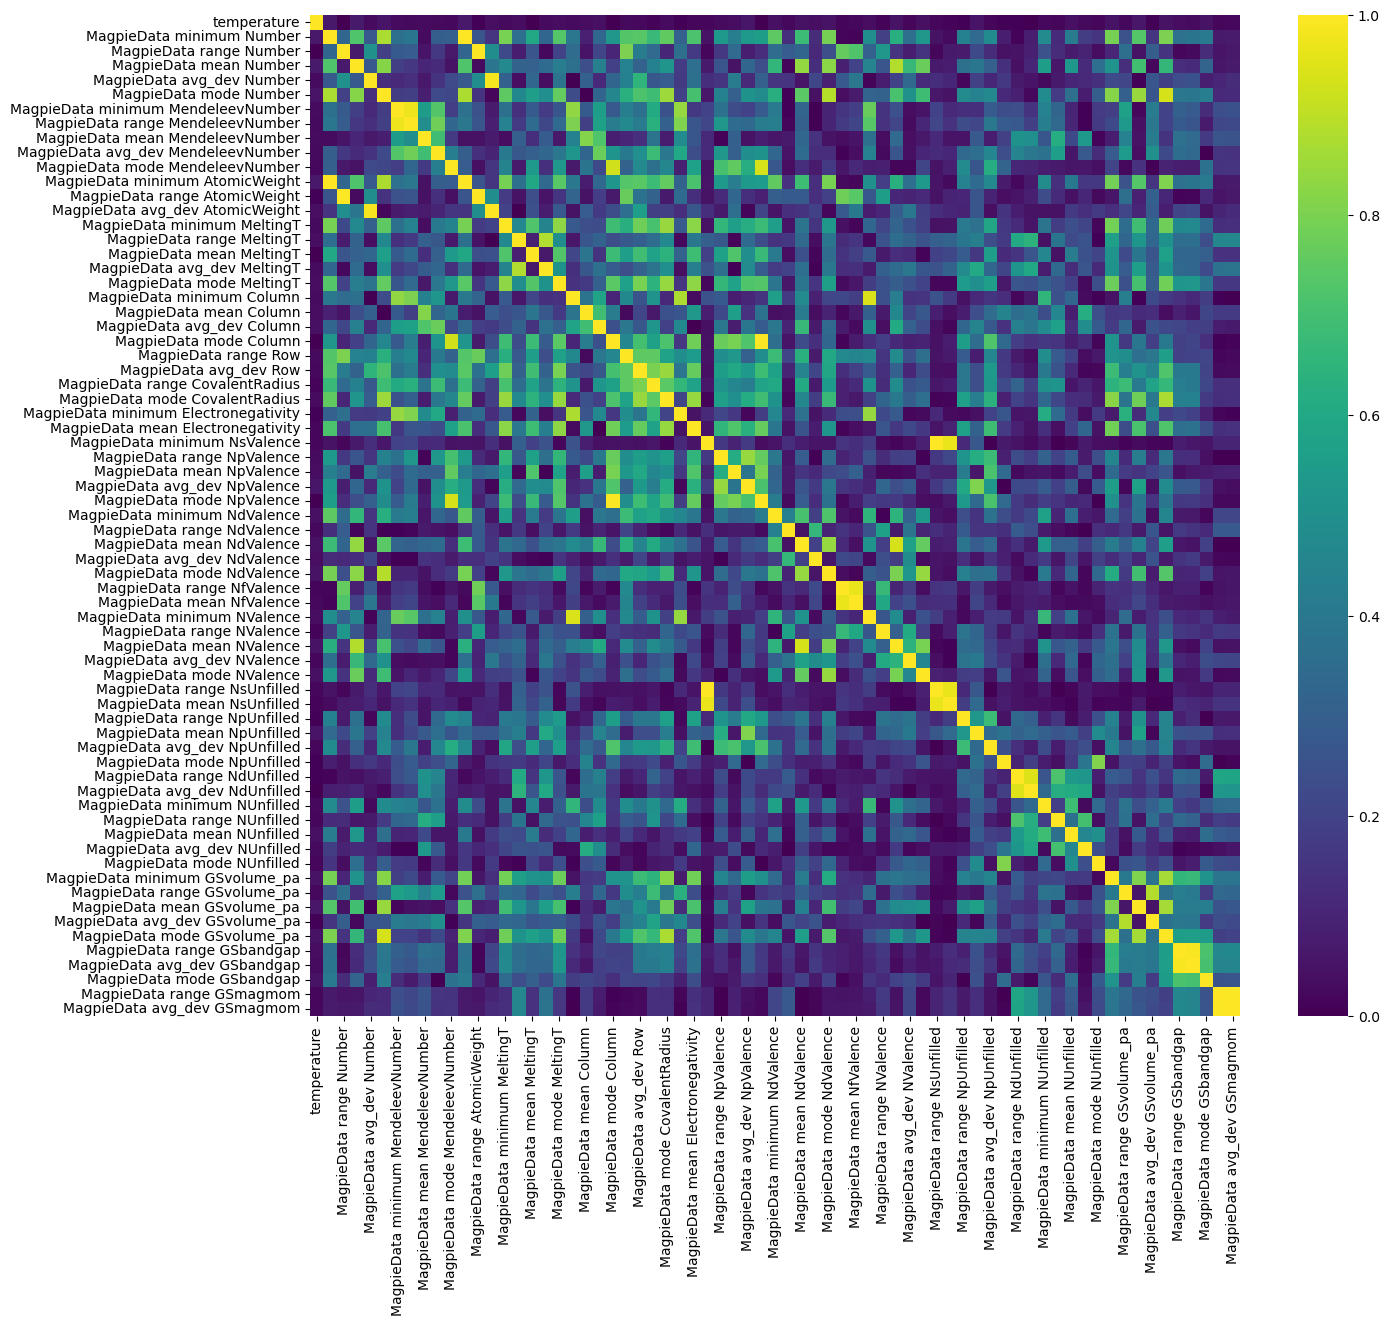

In [173]:
plt.figure(figsize=(15, 13))
corr = df_magpie_feat_without_sg_ff_useful_max_drop_vif.corr(method = 'spearman').abs()
sns.heatmap(corr, vmin=0, vmax=1, cmap='viridis', annot=False)
plt.show()

In [166]:
df_magpie_feat_without_sg_ff_useful_max_drop_vif.shape

(573, 79)

In [174]:
corr = df_magpie_feat_without_sg_ff_useful_max_drop_vif.corr(method = 'spearman').abs()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
high_corr_feats = [column for column in upper.columns if any(upper[column] > 0.90)]
len(high_corr_feats), high_corr_feats

(15,
 ['MagpieData range MendeleevNumber',
  'MagpieData minimum AtomicWeight',
  'MagpieData range AtomicWeight',
  'MagpieData avg_dev AtomicWeight',
  'MagpieData mode Column',
  'MagpieData mode NpValence',
  'MagpieData mean NfValence',
  'MagpieData minimum NValence',
  'MagpieData mean NValence',
  'MagpieData range NsUnfilled',
  'MagpieData mean NsUnfilled',
  'MagpieData avg_dev NdUnfilled',
  'MagpieData mode GSvolume_pa',
  'MagpieData avg_dev GSbandgap',
  'MagpieData avg_dev GSmagmom'])

In [175]:
feat = 'MagpieData minimum AtomicWeight'
upper[feat][upper[feat] > 0.75]

MagpieData minimum Number    0.998099
MagpieData mode Number       0.875325
Name: MagpieData minimum AtomicWeight, dtype: float64

In [177]:
rf = RandomForestRegressor()
y_pred = cross_val_predict(rf, df_magpie_feat_without_sg_ff_useful_max_drop_vif, y_sc, cv=5)
get_score(y_sc, y_pred)

{'R': 0.92934762,
 'R2': 0.86340164,
 'MAE': 41.09408219,
 'RMSE': 73.91383243,
 'RAE': 0.27171568,
 'RSE': 0.13659836}

In [178]:
from sklearn.preprocessing import StandardScaler

In [179]:
scaler = StandardScaler()
df_magpie_feat_without_sg_ff_useful_max_drop_vif_std = pd.DataFrame(scaler.fit_transform(
                                df_magpie_feat_without_sg_ff_useful_max_drop_vif),
                                       columns=df_magpie_feat_without_sg_ff_useful_max_drop_vif.columns)

In [182]:
df_magpie_feat_without_sg_ff_useful_max_drop_vif_std.shape

(573, 69)

In [243]:
rf = RandomForestRegressor()
y_pred = cross_val_predict(rf, df_magpie_feat_without_sg_ff_useful_max_drop_vif_std, y_sc, cv=100)
get_score(y_sc, y_pred)

{'R': 0.93329614,
 'R2': 0.87096195,
 'MAE': 37.77549571,
 'RMSE': 71.83926415,
 'RAE': 0.24977305,
 'RSE': 0.12903805}

In [360]:
mask = df_magpie_feat_without_sg_ff_useful_max_drop_vif['temperature']==300
ddd3 = df_magpie_feat_without_sg_ff_useful_max_drop_vif[mask]
yy3 = y_sc[mask]

In [299]:
rf = RandomForestRegressor()
y_pred = cross_val_predict(rf, ddd3, yy3, cv=5)
get_score(yy3, y_pred)

{'R': 0.07398626,
 'R2': -0.33329205,
 'MAE': 161.55182869,
 'RMSE': 228.27818325,
 'RAE': 1.18479924,
 'RSE': 1.33329205}

In [304]:
from sklearn.model_selection import cross_val_score

In [361]:
reg = RandomForestRegressor(random_state=42)
kfold_cv = KFold(n_splits=204)
y_pred_cv = cross_val_predict(reg,ddd3.drop('temperature', axis=1),yy3,cv=kfold_cv)
get_score(yy3, y_pred_cv)

{'R': 0.74228946,
 'R2': 0.54631471,
 'MAE': 72.82262333,
 'RMSE': 133.16163239,
 'RAE': 0.53407126,
 'RSE': 0.45368529}

In [317]:
yp = cross_val_score(reg,ddd3,yy3,cv=kfold_cv, scoring='r2')

In [318]:
yp

array([-0.83190769, -3.46332686, -0.30176815, -0.70737925, -1.72747615,
        0.43352506,  0.30826346, -0.91627936,  0.15887968,  0.11176243])

In [367]:
df_magpie.iloc[:204,:][(yy3 - y_pred_cv).abs()>=400]

,Formula,temperature,seebeck_coefficient,electrical_conductivity,thermal_conductivity,power_factor,ZT,composition,MagpieData minimum Number,MagpieData maximum Number,...,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
43,La1.0Co1.0O3.0,300,-390,0.130,1.879,0.000002,0.000315,La1 Co1 O3,8.0,57.0,...,1.548471,0.309694,0.495511,0.0,12.0,194.0,182.0,84.800000,87.360000,12.0
61,Cu1.0Cr1.0O2.0,300,1235,0.054,6.586,0.000008,0.000379,Cu1 Cr1 O2,8.0,29.0,...,0.000000,0.000000,0.000000,0.0,12.0,229.0,217.0,119.500000,107.500000,12.0
73,Fe1.96Sn0.04O3.0,300,-364,21400.000,6.840,0.000028,0.001250,Fe1.96 Sn0.04 O3,8.0,50.0,...,2.110663,0.827380,1.006094,0.0,12.0,229.0,217.0,98.096000,103.315200,12.0
74,Nd2.0Cu1.0O4.0,300,-752,0.343,29.600,0.000019,0.000196,Nd2 Cu1 O4,8.0,60.0,...,0.000000,0.000000,0.000000,0.0,12.0,225.0,213.0,94.428571,94.204082,12.0
144,Bi2.0Te3.0,300,-174,2220.000,4.017,0.006730,0.500000,Bi2 Te3,52.0,83.0,...,0.000000,0.000000,0.000000,0.0,12.0,152.0,140.0,96.000000,67.200000,152.0
162,Cu4.0Mo6.0S8.0,300,48,1200.000,1.348,0.000275,0.060000,Cu4 Mo6 S8,16.0,42.0,...,0.000000,0.000000,0.000000,0.0,70.0,229.0,159.0,157.444444,77.728395,70.0


<AxesSubplot: >

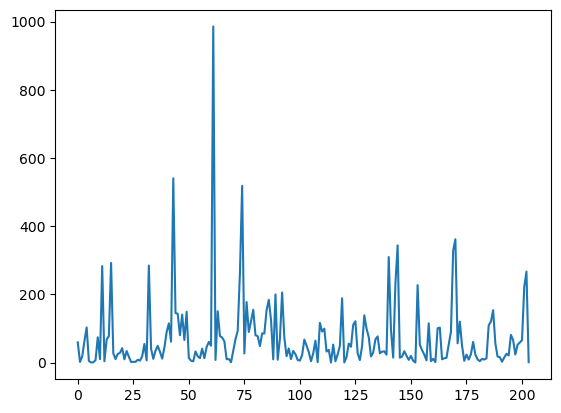

In [355]:
(yy3 - y_pred_cv).abs().plot.line()

In [352]:
reg = RandomForestRegressor(random_state=42)
kfold_cv = KFold(n_splits=5, shuffle=True)
y_pred_cv = cross_val_predict(reg,ddd3.drop('temperature', axis=1),yy3,cv=kfold_cv)
get_score(yy3, y_pred_cv)

{'R': 0.7597568,
 'R2': 0.57695952,
 'MAE': 71.55529505,
 'RMSE': 128.5857157,
 'RAE': 0.52477685,
 'RSE': 0.42304048}

In [302]:
list(zip(yy3.values, y_pred_cv))

[(-100, 30.54),
 (-91, 32.92),
 (-180, 9.645),
 (-162, -164.48666666666668),
 (-104, -168.58666666666667),
 (-75, 48.67166666666668),
 (-46, 62.44166666666667),
 (-72, 47.49166666666668),
 (-44, 63.93666666666667),
 (-71, 18.75166666666666),
 (-42, 19.018333333333334),
 (-651, 35.094166666666666),
 (-109, 32.63916666666667),
 (-53, 29.09666666666667),
 (-38, 12.634166666666664),
 (69, -287.968),
 (-33, -43.30333333333333),
 (-358, 35.094166666666666),
 (-83, 52.33833333333334),
 (-477, 35.094166666666666),
 (-156, 47.98675),
 (-89, -2.2932500000000005),
 (-50, -6.373249999999998),
 (-47, -6.373249999999998),
 (-51, -6.453249999999998),
 (-53, -6.453249999999998),
 (-52, -7.863249999999998),
 (-54, -19.238),
 (-42, -26.784666666666666),
 (-52, -35.95466666666667),
 (-98, -28.908),
 (-64, -35.95466666666667),
 (-301, 134.99875),
 (-154, 201.56599999999997),
 (-179, 201.56599999999997),
 (-138, 201.56599999999997),
 (-175, 193.416),
 (-40, -42.94466666666667),
 (-92, -30.634666666666668),

In [303]:
204/5

40.8

Text(0, 0.5, 'Calc')

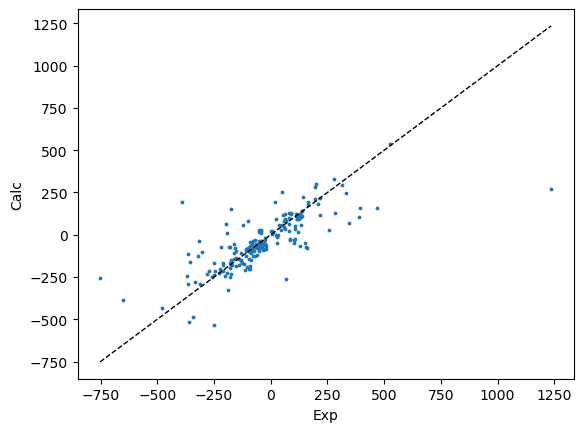

In [291]:
y11=yy3
plt.scatter(y11,y_pred_cv,marker='o',s=3)#,c=data['temperature'][np.abs(y1)<500])
plt.plot([np.min(y11), np.max(y11)], [np.min(y11), np.max(y11)],'k--', lw=1)
plt.xlabel('Exp')
plt.ylabel('Calc')